# Основы машинного обучения (ИАД)
## НИУ ВШЭ, 2021-2022 учебный год

### Домашнее задание №8

In [311]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, mean_squared_error

# Бустинг

## Градиентный бустинг своими руками (3 + 2* баллов)

Реализуйте алгоритм градиентного бустинга для регрессии. Напомним **основные формулы**.

Обозначим текущую композицию на $N-1$ шаге за $a_{N - 1}(x_i)$. Следующий базовый алгоритм $b_N(x_i)$ обучается на ответах $-\frac{\partial L(y_i, z)}{\partial z}\Bigl|_{z = a_{N - 1}(x_i)}$, где $L(y_i, z)$ — значение функции потерь на объекте при правильном ответе $y_i$ и предсказании $z$. Композиция на следующем шаге получается следующим образом:

$$
a_N(x_i) = a_{N-1}(x_i) + \nu\gamma_Nb_N(x_i)
$$

Здесь $\nu$ — гиперпараметр learning rate, $\gamma_N$ — оптимальный вес, настраиваемый на каждом шаге алгоритма, который можно найти по следующей формуле (обратите внимание на отсутствие $\nu$):

$$
\gamma_N = \mathrm{arg}\min_\gamma \frac{1}{\ell}\sum\limits_{i=1}^{\ell}L\left(y_i, a_{N - 1}(x_i) + \gamma b_N(x_i)\right)
$$

Можете принять $\gamma_N = 1$ для каждого $N$.

> Реализуйте нахождение оптимального $\gamma_N$ на каждом шаге, чтобы получить ещё 1 балл.


В качестве функции потерь возьмите **MSE**.

*Примечание. Вы можете использовать `DecisionTree` из `sklearn` и методы оптимизации из различных библиотек.*

In [312]:
# это может помочь вам для поиска оптимальных gamma
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize

In [313]:
from operator import itemgetter
from sklearn.base import BaseEstimator

In [314]:
class GradientBoosting(BaseEstimator):
    def __init__(self, n_estimators, max_depth=1, learning_rate=0.1):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        learning_rate - coefficient by which new algorithm result is multiplied
        """
        # your code here
        self.trees = []
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.gammas = []
        
        
    def fit(self, x, y):
        """
        INPUT:
        x - np.array of shape (k, d)
        y - np.array of shape (k,)
        """
        # Здесь нам нужно проитерироваться по n_estimators и обучить
        # соответствующее количество деревьев с помощью _fit_predict_tree(),
        # правильно обновляя y_new
        # Деревья нужно где-то сохранить, чтобы затем использовать в predict()
        # your code here
        y_predicted = np.zeros(x.shape[0])
        for i in range(self.n_estimators):
            # your code here
            y_new = y - y_predicted
            y_predicted += self._fit_predict_tree(x, y_new)
        
    

    def _fit_predict_tree(self, x, y_new):
        # Обучаем дерево и возвращаем его предикшн
        # your code here
        tree = DecisionTreeRegressor(max_depth = self.max_depth)
        tree.fit(x, y_new)
        self.trees.append(tree)
        return self.learning_rate * tree.predict(x) # * self.gamma
        
    def predict(self, x):
        """
        INPUT:
        x - np.array of shape (m, d)
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        # Используем сохранённые деревья для расчёта агрегированного предикшна
        # your code here
        y_pred = np.zeros(x.shape[0])
        for i in range(self.n_estimators):
            y_pred += self.learning_rate * self.trees[i].predict(x)
         
        return y_pred

In [315]:
class GradientBoosting_gamma(BaseEstimator):
    def __init__(self, n_estimators, max_depth=1, learning_rate=0.1):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        learning_rate - coefficient by which new algorithm result is multiplied
        """
        # your code here
        self.trees = []
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.gammas = []
        
        
    def fit(self, x, y):
        """
        INPUT:
        x - np.array of shape (k, d)
        y - np.array of shape (k,)
        """
        # Здесь нам нужно проитерироваться по n_estimators и обучить
        # соответствующее количество деревьев с помощью _fit_predict_tree(),
        # правильно обновляя y_new
        # Деревья нужно где-то сохранить, чтобы затем использовать в predict()
        # your code here
        y_predicted = np.zeros(x.shape[0])
        for i in range(self.n_estimators):
            # your code here
            y_new = y - y_predicted
            y_predicted += self._fit_predict_tree(x, y_new, y_predicted,y)
        
    

    def _fit_predict_tree(self, x, y_new, y_predicted,y):
        # Обучаем дерево и возвращаем его предикшн
        # your code here
        tree = DecisionTreeRegressor(max_depth = self.max_depth)
        tree.fit(x, y_new)
        self.trees.append(tree)
        def mse_custom(g: float):
            return mean_squared_error(y, y_predicted + g * tree.predict(x)) 
        mini = minimize(mse_custom, [-3])
        gamma_n = mini.x
        self.gammas.append(gamma_n)
        return gamma_n * self.learning_rate * tree.predict(x) # * self.gamma
        
    def predict(self, x):
        """
        INPUT:
        x - np.array of shape (m, d)
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        # Используем сохранённые деревья для расчёта агрегированного предикшна
        # your code here
        y_pred = np.zeros(x.shape[0])
        for i in range(self.n_estimators):
            y_pred += self.gammas[i] * self.learning_rate * self.trees[i].predict(x)
         
        return y_pred

Проверьте вашу реализацию на Boston dataset. 

> Подберите оптимальные гиперпараметры, чтобы победить RandomForestRegressor как в обычном случае, так и при нахождении оптимального шага **(не меняйте параметры сида)**. При необходимости воспользуйтесь GridSearch. За это вы получите ещё 1 балл.



In [332]:
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [317]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_features=4, n_estimators=640, random_state=19052019)

rf.fit(X_train, y_train)
mean_squared_error(y_test, rf.predict(X_test))

9.63198271791959

In [318]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

In [319]:
grid = {'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
               'max_depth': range(2, 13),
               'n_estimators': range(100, 700, 50)}

In [320]:
%%time
np.random.seed(19052019)
best_score = 100000000000000
for g in ParameterGrid(grid):
    np.random.seed(19052019)
    gb_mine = GradientBoosting(n_estimators=1)
    gb_mine.set_params(**g)
    gb_mine.fit(X_train, y_train)
    if mean_squared_error(y_test, gb_mine.predict(X_test)) <= best_score:
        best_score = mean_squared_error(y_test, gb_mine.predict(X_test))
        best_grid = g

print(best_score) 
print(best_grid)

9.420504687896173
{'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 150}
Wall time: 9min 27s


In [321]:
%%time

np.random.seed(19052019)

gb_mine = GradientBoosting(n_estimators=150, max_depth=6, learning_rate=0.2)
gb_mine.fit(X_train, y_train)

mean_squared_error(y_test, gb_mine.predict(X_test))

Wall time: 414 ms


9.420504687896173

Победили без гамм

In [334]:
grid = {'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
               'max_depth': range(2, 13),
               'n_estimators': range(30, 100, 5)}

In [335]:
%%time
np.random.seed(19052019)
best_score = 100000000000000
for g in ParameterGrid(grid):
    np.random.seed(19052019)
    gb_mine = GradientBoosting_gamma(n_estimators=1)
    gb_mine.set_params(**g)
    gb_mine.fit(X_train, y_train)
    if mean_squared_error(y_test, gb_mine.predict(X_test)) <= best_score:
        best_score = mean_squared_error(y_test, gb_mine.predict(X_test))
        best_grid = g

print(best_score) 
print(best_grid)

9.528572118590459
{'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 35}
Wall time: 5min 45s


Ручками можно улучшить до 9.508... (хотя и без этого победили RandomForest)

In [344]:
np.random.seed(19052019)

gb_mine = GradientBoosting_gamma(n_estimators=36, max_depth=6, learning_rate=0.2)
gb_mine.fit(X_train, y_train)

mean_squared_error(y_test, gb_mine.predict(X_test))

9.50837761915646

Победили с гаммами

Для удобства проверяющего укажите, пожалуйста, реализовали ли вы нахождение оптимального шага?

-  <span style="color:green"><ins> Да </ins></span> / Нет

## Прогнозируем задержки самолётов (2 балла)

Поработаем с задачей про задержки самолётов. На основании доступных данных о рейсе вам нужно определить, будет ли он задержан на 15 минут.
Воспользуйтесь любыми методами градиентного бустинга {`XGboost`, `catboost`, `LightGBM`} и `GridSearchCV` для достижения результата.

> Получите 1 балл за преодоление порога roc_auc_score 0.72 и ещё 1 балл за преодоление порога 0.74.



In [224]:
train = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering-data/flight_delays_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering-data/flight_delays_test.csv')

In [225]:
train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [226]:
test.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258


In [227]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [228]:
# Референс
from xgboost.sklearn import XGBClassifier

X_train = train[['Distance', 'DepTime']].values
y_train = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_test = test[['Distance', 'DepTime']].values
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3)

xgb_model = XGBClassifier()
xgb_model.fit(X_train_part, y_train_part)
roc_auc_score(y_valid, xgb_model.predict_proba(X_valid)[:, 1])

0.708065561113403

In [229]:
np.random.seed(42)
X_train = pd.get_dummies(train.iloc[:, :-2])
y_train = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values

X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3)

In [230]:
np.random.seed(42)
xgb = XGBClassifier()
xgb.fit(X_train_part, y_train_part)

roc_auc_score(y_valid, xgb.predict_proba(X_valid)[:, 1])

0.7407683369812178

# Кластеризация

## DBSCAN своими руками (3 + 2* баллов)


```
DBSCAN: Density-based spatial clustering of applications with noise
```


Реализуйте класс dbscan.

Алгоритм имеет два основных гиперпараметра:
1. `eps` &mdash; радиус рассматриваемой окрестности
2. `min_samples` &mdash; число соседей в окрестности

Для выполнения кластеризации DBSCAN точки делятся на основные точки, достижимые по плотности точки и выпадающие следующим образом:

- Точка $p$ является основной точкой, если по меньшей мере `min_samples` точек находятся на расстоянии, не превосходящем 
`eps` от неё. Говорят, что эти точки достижимы прямо из $p$.

-  Точка $q$ прямо достижима из $p$, если точка $q$ находится на расстоянии, не большем `eps`, от точки $p$, и $p$ — основная точка.
Точка $q$ достижима из $p$, если имеется путь 
$p_1,…,p_n$ где $p_1=p$ и $p_n=q$ , а каждая точка $p_{i+1}$ достижима прямо из $p_i$ (все точки на пути должны быть основными, за исключением $q$).

Все точки, не достижимые из основных точек, считаются выбросами.

Теперь, если $p$ является основной точкой, то она формирует кластер вместе со всеми точками (основными или неосновными), достижимыми из этой точки. Каждый кластер содержит по меньшей мере одну основную точку. Неосновные точки могут быть частью кластера, но они формируют его «край», поскольку не могут быть использованы для достижения других точек.


In [231]:
# Это может помочь вам для поиска дистанции между точками
from scipy.spatial import distance

In [348]:
# Рекомендации -- это только рекомендации
class dbscan:
    def __init__(self, eps, min_samples):
        # your code here
        self.eps = eps
        self.min_samples = min_samples
        
        
        
    def fit_predict(self, X):
        self.X = X
        n_points = self.X.shape[0]
        self.current_cluster = 0
        
        self.distances = {}
        
        for i in range(n_points):
            for j in range(i + 1, n_points):
                self.distances[repr((i, j))] = dist(self.X[i], self.X[j])
        # Помечаем переданные точки, чтобы отличать уже кластеризованные
        # или являющиеся шумом от остальных
        # your code here
        self.labels = [0] * n_points
        # Реализуем цикл по точкам, игнорирущий уже кластеризованные
        # your code here
        for point in range(n_points):
            if not(self.labels[point] == 0):
                continue
            else:
                # Если точка ещё не кластеризована, с помощью range_query() ищем её соседей
                # your code here
                neighbours_of_point = self.range_query(point)
                if len(neighbours_of_point) < self.min_samples:
                    # Если соседей недостаточно, то помечаем её выделенным под шум лейблом
                    # (однако она ещё может попасть в какой-то иной кластер)
                    # your code here
                    self.labels[point] = -1
                else:
                    # Если же соседей достаточно, будем строить от неё кластер с помощью grow_cluster()
                    # your code here
                    self.current_cluster += 1
                    self.grow_cluster(point, neighbours_of_point)
                    
                    
        return self.labels
        
        
        

    def grow_cluster(self, root, neighbours):
        # В этой функции мы полностью строим кластер относительно переданной точки
        # Т.е. реализуем цикл по структуре данных, изначально состоящей из уже
        # известных соседей (neighbours) и в процессе пополняющейся
        # "соседями соседей" с помощью range_query()
        # your code here
        i = 0
        while i < len(neighbours):
            point = neighbours[i]
            if self.labels[point] == -1:
                self.labels[point] = self.current_cluster
            elif self.labels[point] == 0:
                self.labels[point] = self.current_cluster
                neighbours_of_point = self.range_query(point)
                if len(neighbours_of_point) >= self.min_samples:
                    neighbours = neighbours + neighbours_of_point
            i += 1
                


    def range_query(self, x):
        """Возвращает точки на расстоянии <= eps от x"""
        # С помощью функции dist()
        # your code here
        neighbours = []
        for y in range(0, len(self.X)):
            if x < y:
                if self.distances[repr((x, y))] < self.eps:
                    neighbours.append(y)
            if x > y:
                if self.distances[repr((y, x))] < self.eps:
                    neighbours.append(y)
            
        return neighbours

    
    @staticmethod
    def dist(a, b):
        """Метрика расстояния"""
        # Попробуйте что-нибудь из scipy.spatial.distance
        # Базовый вариант -- Евклидова метрика
        # your code here
        return distance.euclidean(a, b)

In [233]:
def dist(a, b):
        """Метрика расстояния"""
        # Попробуйте что-нибудь из scipy.spatial.distance
        # Базовый вариант -- Евклидова метрика
        # your code here
        return distance.euclidean(a, b)

Проверим себя на простом примере:

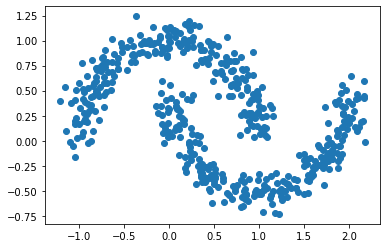

In [271]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)
X, _ = make_moons(n_samples=500, noise=0.1)
plt.scatter(X[:,0], X[:,1])
plt.show()

Кластеризуйте это с помощью своей версии DBSCAN:

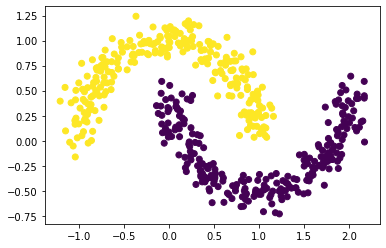

In [245]:
# your code here
clust = dbscan(eps=0.2, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clust)
plt.show()

Референс:

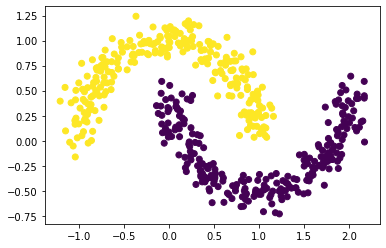

In [246]:
from sklearn.cluster import DBSCAN

clusters = DBSCAN(eps=0.2, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()


> Получите 1 балл за ещё один интересный пример кластеризации (в качестве референса используйте предоставленное изображение. Нужно несколько интересных соседствующих форм):



In [237]:
np.random.seed(42)
noize = 8 * np.random.random_sample((100, 2)) - 4

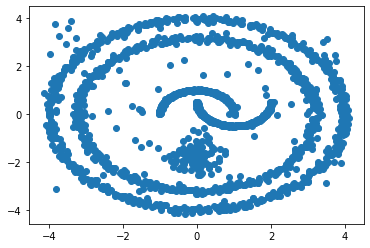

In [285]:
np.random.seed(42)
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs

X, _ = make_circles(n_samples=1000, factor=0.8, noise=0.02)
Y, _ = make_moons(n_samples=1000, noise=0.02)
Z, _ = make_blobs(n_samples=100, cluster_std=0.4, centers = [(0, -1.75)], random_state=42)
np.random.seed(42)
noize = 8 * np.random.random_sample((100, 2)) - 4

N = np.concatenate((X * 4, Y))
N = np.concatenate((N, Z))
N = np.concatenate((N, noize))
plt.scatter(N[:,0], N[:,1])
plt.show()

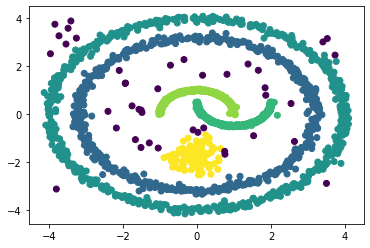

In [289]:
clust = dbscan(eps=0.3, min_samples=7).fit_predict(N)
plt.scatter(N[:,0], N[:,1], c=clust)
plt.show()

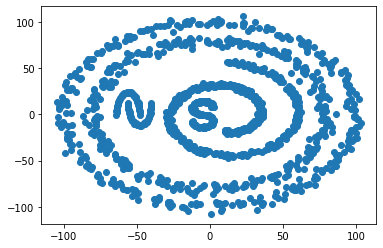

In [ ]:
# your code here


Или хотя бы что-нибудь такое: 

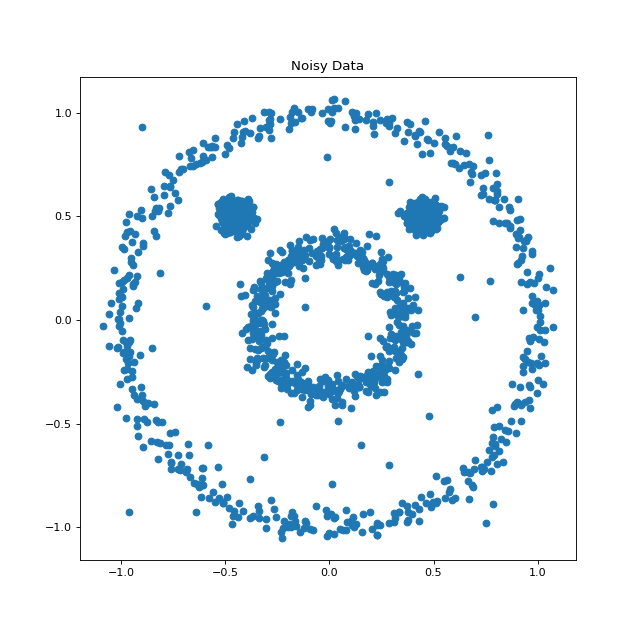

Или смайлик:

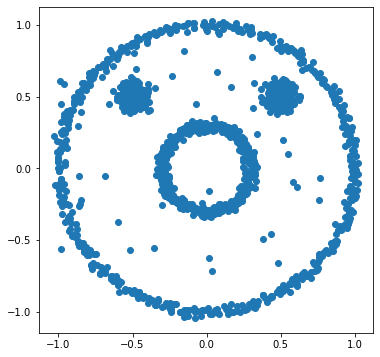

In [290]:
# your code here
np.random.seed(42)
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs

X, _ = make_circles(n_samples=1000, factor=0.3, noise=0.02)

cent = np.array([0, -1]).reshape(-1, 1)
Z, _ = make_blobs(n_samples=500, cluster_std=0.05, centers = [(-0.5, 0.5), (0.5, 0.5)], random_state=42)
noize = 2 * np.random.random_sample((50, 2)) - 1

N = np.concatenate((X, Z))
N = np.concatenate((N, noize))
plt.figure(figsize= (6,6))
plt.scatter(N[:,0], N[:,1])
plt.show()

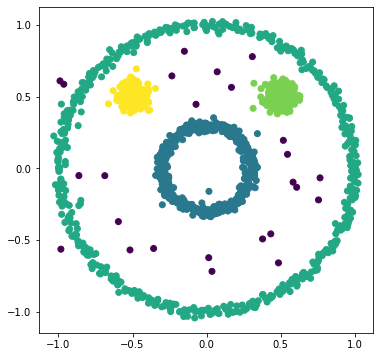

In [291]:
clust = dbscan(eps=0.1, min_samples=10).fit_predict(N)
plt.figure(figsize= (6,6))
plt.scatter(N[:,0], N[:,1], c=clust)
plt.show()


> Получите ещё 1 балл, если время работы вашего алгоритма больше референсного не более чем в 100 раз с учётом погрешности 3% от вашего времени:



In [272]:
%%time
%%capture
clusters = DBSCAN(eps=0.2, min_samples=10).fit_predict(X)

Wall time: 2.96 ms


In [273]:
%%time
%%capture
clusters = dbscan(eps=0.2, min_samples=10).fit_predict(X)

Wall time: 1.54 s


## Применяем DBSCAN (3 балла)

__[1.5 балла]__ Возьмите колонки `Distance` и `DepTime` (из датасета о задержках самолётов). Запустите на тренировочной выборке на них DBSCAN. Нарисуйте облоко рассеивания с получившимися кластерами. Насколько много их вышло? 

In [345]:
X_train = train[['Distance', 'DepTime']].values

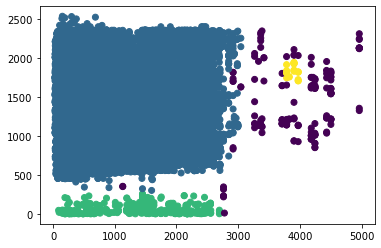

Wall time: 12.1 s


In [347]:
%%time
# your code here  ლ(ಠ益ಠლ)

clust = DBSCAN(eps=150, min_samples=23).fit_predict(X_train)

plt.scatter(X_train[:,0], X_train[:,1], c=clust)
plt.show()

Попробуйте перебрать параметры `eps` и `min_samples` по решётке и нарисовать для каждой пары облако рассеивания. При каких параметрах шумовых точек оказывается больше всего? Почему так происходит? 

__Ответ:__ 

Wall time: 6min 37s


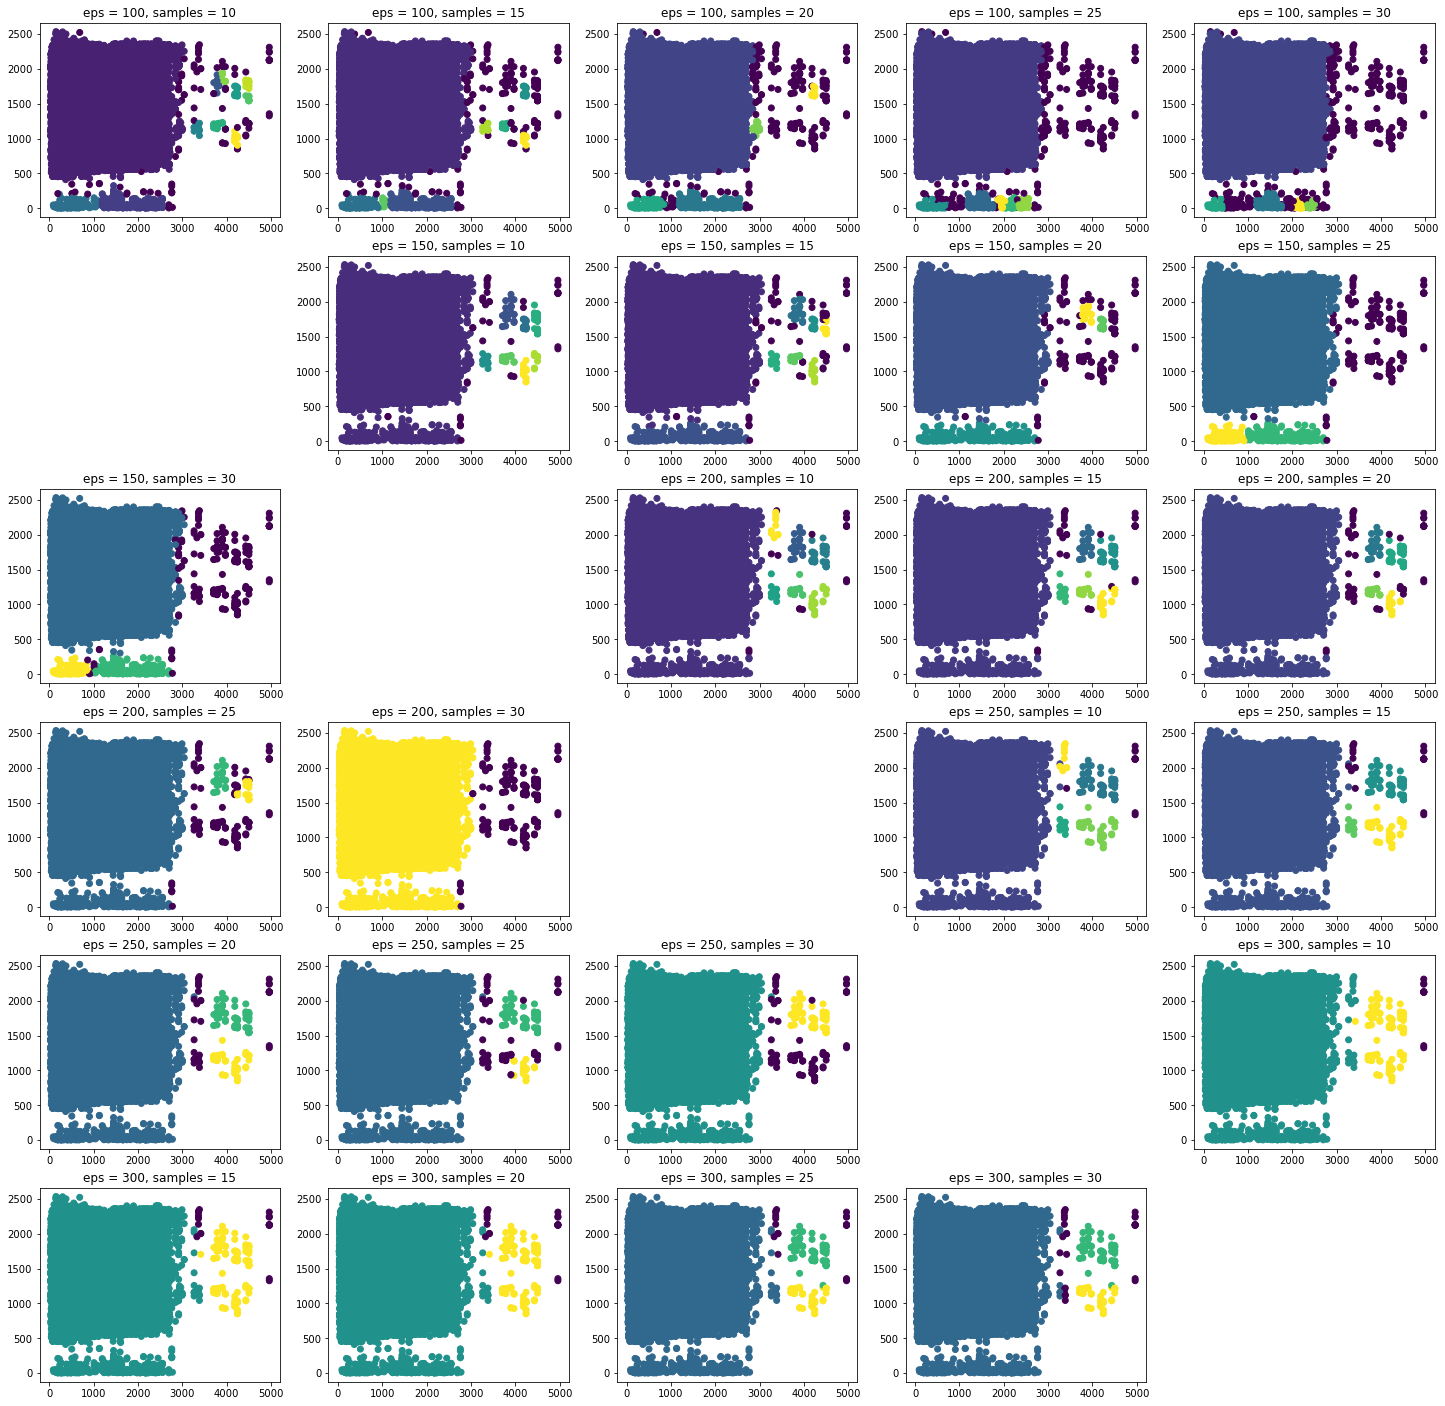

In [327]:
%%time
# your code here   ⟅⎛ꌩωꌩ⎞⟆
plt.figure(figsize= (25,25))
i = 1
for eps in range(100, 350, 50):
    for min_samples in range(10, 35, 5):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_train)
        plt.subplot(6, 5, i)
        plt.scatter(X_train[:,0], X_train[:,1], c = clusters)
        plt.title('eps = {}, samples = {}'.format(eps, min_samples))
        i += 1
    i += 1

Больше всего шумовых точек при больших min_samples и маленьких eps, потому что при этих параметрах сложно формировать кластеры (т.е. чтобы точка стала основной и из нее распостранился новый кластер, в очень малленькой ее окрестности должно лежать очень много точек)

__[1.5 балла]__ Добавьте в датасет новую категориальную переменную: номер кластера из DBSCAN и обучите Catboost со своими лучшими гиперпараметрами. Улучшилось ли качество модели на тестовой выборке? Как думаете, почему? 

In [328]:
# your code here  ¯\_(ツ)_/¯
X_train_db = pd.DataFrame({'Distance': train['Distance'], 'DepTime': train['DepTime'], 'DBSCAN': clust})
y_train_db = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values


X_train_part_db, X_valid_db, y_train_part_db, y_valid_db = train_test_split(X_train_db, y_train_db, test_size=0.3, random_state=42)

In [329]:
%%time
from catboost import CatBoostClassifier
np.random.seed(42)
cat_db = CatBoostClassifier()

cat_db.fit(X_train_part_db, y_train_part_db)
roc_auc_score(y_valid_db, cat_db.predict_proba(X_valid_db)[:, 1])

Learning rate set to 0.063211
0:	learn: 0.6588036	total: 29.9ms	remaining: 29.9s
1:	learn: 0.6295921	total: 43.5ms	remaining: 21.7s
2:	learn: 0.6043593	total: 54.2ms	remaining: 18s
3:	learn: 0.5851020	total: 60.8ms	remaining: 15.1s
4:	learn: 0.5679433	total: 68.5ms	remaining: 13.6s
5:	learn: 0.5519393	total: 77.1ms	remaining: 12.8s
6:	learn: 0.5373373	total: 85.4ms	remaining: 12.1s
7:	learn: 0.5254016	total: 93.4ms	remaining: 11.6s
8:	learn: 0.5148856	total: 101ms	remaining: 11.1s
9:	learn: 0.5070106	total: 108ms	remaining: 10.7s
10:	learn: 0.4995525	total: 116ms	remaining: 10.4s
11:	learn: 0.4927027	total: 124ms	remaining: 10.2s
12:	learn: 0.4874856	total: 133ms	remaining: 10.1s
13:	learn: 0.4819427	total: 140ms	remaining: 9.89s
14:	learn: 0.4770970	total: 150ms	remaining: 9.83s
15:	learn: 0.4737300	total: 158ms	remaining: 9.74s
16:	learn: 0.4703835	total: 166ms	remaining: 9.62s
17:	learn: 0.4676635	total: 175ms	remaining: 9.52s
18:	learn: 0.4647793	total: 182ms	remaining: 9.41s
19:	l

182:	learn: 0.4415969	total: 1.46s	remaining: 6.5s
183:	learn: 0.4415760	total: 1.46s	remaining: 6.5s
184:	learn: 0.4415441	total: 1.47s	remaining: 6.49s
185:	learn: 0.4415171	total: 1.48s	remaining: 6.48s
186:	learn: 0.4414905	total: 1.49s	remaining: 6.47s
187:	learn: 0.4414650	total: 1.5s	remaining: 6.46s
188:	learn: 0.4414310	total: 1.5s	remaining: 6.45s
189:	learn: 0.4414085	total: 1.51s	remaining: 6.44s
190:	learn: 0.4413772	total: 1.52s	remaining: 6.43s
191:	learn: 0.4413346	total: 1.53s	remaining: 6.42s
192:	learn: 0.4412950	total: 1.53s	remaining: 6.42s
193:	learn: 0.4412661	total: 1.54s	remaining: 6.41s
194:	learn: 0.4412212	total: 1.55s	remaining: 6.4s
195:	learn: 0.4411990	total: 1.56s	remaining: 6.39s
196:	learn: 0.4411726	total: 1.56s	remaining: 6.38s
197:	learn: 0.4411479	total: 1.57s	remaining: 6.36s
198:	learn: 0.4411184	total: 1.58s	remaining: 6.36s
199:	learn: 0.4410875	total: 1.59s	remaining: 6.35s
200:	learn: 0.4410594	total: 1.59s	remaining: 6.34s
201:	learn: 0.441

344:	learn: 0.4373399	total: 2.74s	remaining: 5.2s
345:	learn: 0.4373262	total: 2.75s	remaining: 5.19s
346:	learn: 0.4373085	total: 2.75s	remaining: 5.18s
347:	learn: 0.4372808	total: 2.76s	remaining: 5.17s
348:	learn: 0.4372605	total: 2.77s	remaining: 5.17s
349:	learn: 0.4372359	total: 2.78s	remaining: 5.16s
350:	learn: 0.4372185	total: 2.78s	remaining: 5.15s
351:	learn: 0.4371942	total: 2.79s	remaining: 5.14s
352:	learn: 0.4371731	total: 2.8s	remaining: 5.13s
353:	learn: 0.4371537	total: 2.81s	remaining: 5.12s
354:	learn: 0.4371340	total: 2.81s	remaining: 5.12s
355:	learn: 0.4371152	total: 2.82s	remaining: 5.11s
356:	learn: 0.4371052	total: 2.83s	remaining: 5.1s
357:	learn: 0.4370670	total: 2.84s	remaining: 5.09s
358:	learn: 0.4370438	total: 2.85s	remaining: 5.08s
359:	learn: 0.4370168	total: 2.85s	remaining: 5.07s
360:	learn: 0.4369940	total: 2.86s	remaining: 5.07s
361:	learn: 0.4369853	total: 2.87s	remaining: 5.06s
362:	learn: 0.4369546	total: 2.88s	remaining: 5.05s
363:	learn: 0.4

510:	learn: 0.4338156	total: 4.04s	remaining: 3.87s
511:	learn: 0.4337915	total: 4.05s	remaining: 3.86s
512:	learn: 0.4337746	total: 4.06s	remaining: 3.86s
513:	learn: 0.4337596	total: 4.07s	remaining: 3.85s
514:	learn: 0.4337338	total: 4.08s	remaining: 3.84s
515:	learn: 0.4337184	total: 4.09s	remaining: 3.83s
516:	learn: 0.4337006	total: 4.09s	remaining: 3.82s
517:	learn: 0.4336854	total: 4.1s	remaining: 3.82s
518:	learn: 0.4336678	total: 4.11s	remaining: 3.81s
519:	learn: 0.4336506	total: 4.12s	remaining: 3.8s
520:	learn: 0.4336330	total: 4.13s	remaining: 3.79s
521:	learn: 0.4336105	total: 4.13s	remaining: 3.78s
522:	learn: 0.4335919	total: 4.14s	remaining: 3.78s
523:	learn: 0.4335731	total: 4.15s	remaining: 3.77s
524:	learn: 0.4335424	total: 4.16s	remaining: 3.76s
525:	learn: 0.4335266	total: 4.16s	remaining: 3.75s
526:	learn: 0.4335036	total: 4.17s	remaining: 3.74s
527:	learn: 0.4334850	total: 4.18s	remaining: 3.73s
528:	learn: 0.4334742	total: 4.19s	remaining: 3.73s
529:	learn: 0.

671:	learn: 0.4307296	total: 5.32s	remaining: 2.6s
672:	learn: 0.4307168	total: 5.33s	remaining: 2.59s
673:	learn: 0.4306998	total: 5.34s	remaining: 2.58s
674:	learn: 0.4306808	total: 5.35s	remaining: 2.57s
675:	learn: 0.4306585	total: 5.35s	remaining: 2.57s
676:	learn: 0.4306378	total: 5.36s	remaining: 2.56s
677:	learn: 0.4306185	total: 5.37s	remaining: 2.55s
678:	learn: 0.4305942	total: 5.38s	remaining: 2.54s
679:	learn: 0.4305767	total: 5.39s	remaining: 2.53s
680:	learn: 0.4305527	total: 5.39s	remaining: 2.53s
681:	learn: 0.4305362	total: 5.4s	remaining: 2.52s
682:	learn: 0.4305059	total: 5.41s	remaining: 2.51s
683:	learn: 0.4304968	total: 5.42s	remaining: 2.5s
684:	learn: 0.4304827	total: 5.42s	remaining: 2.49s
685:	learn: 0.4304642	total: 5.43s	remaining: 2.49s
686:	learn: 0.4304449	total: 5.44s	remaining: 2.48s
687:	learn: 0.4304224	total: 5.45s	remaining: 2.47s
688:	learn: 0.4304041	total: 5.46s	remaining: 2.46s
689:	learn: 0.4303927	total: 5.46s	remaining: 2.45s
690:	learn: 0.4

835:	learn: 0.4279913	total: 6.62s	remaining: 1.3s
836:	learn: 0.4279652	total: 6.63s	remaining: 1.29s
837:	learn: 0.4279528	total: 6.63s	remaining: 1.28s
838:	learn: 0.4279425	total: 6.64s	remaining: 1.27s
839:	learn: 0.4279309	total: 6.65s	remaining: 1.27s
840:	learn: 0.4279202	total: 6.66s	remaining: 1.26s
841:	learn: 0.4279009	total: 6.67s	remaining: 1.25s
842:	learn: 0.4278872	total: 6.67s	remaining: 1.24s
843:	learn: 0.4278629	total: 6.68s	remaining: 1.23s
844:	learn: 0.4278423	total: 6.69s	remaining: 1.23s
845:	learn: 0.4278174	total: 6.7s	remaining: 1.22s
846:	learn: 0.4277994	total: 6.7s	remaining: 1.21s
847:	learn: 0.4277752	total: 6.71s	remaining: 1.2s
848:	learn: 0.4277632	total: 6.72s	remaining: 1.2s
849:	learn: 0.4277421	total: 6.73s	remaining: 1.19s
850:	learn: 0.4277254	total: 6.73s	remaining: 1.18s
851:	learn: 0.4277119	total: 6.74s	remaining: 1.17s
852:	learn: 0.4276958	total: 6.75s	remaining: 1.16s
853:	learn: 0.4276809	total: 6.76s	remaining: 1.16s
854:	learn: 0.427

997:	learn: 0.4254087	total: 7.89s	remaining: 15.8ms
998:	learn: 0.4253992	total: 7.9s	remaining: 7.91ms
999:	learn: 0.4253875	total: 7.91s	remaining: 0us
Wall time: 8.41 s


0.7070259640537008

In [330]:
X_train = pd.DataFrame({'Distance': train['Distance'], 'DepTime': train['DepTime']})
y_train = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values


X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [331]:
%%time
np.random.seed(42)
cat = CatBoostClassifier()

cat.fit(X_train_part, y_train_part)
roc_auc_score(y_valid, cat.predict_proba(X_valid)[:, 1])

Learning rate set to 0.063211
0:	learn: 0.6591842	total: 9.37ms	remaining: 9.36s
1:	learn: 0.6297173	total: 16.9ms	remaining: 8.43s
2:	learn: 0.6051966	total: 24.2ms	remaining: 8.04s
3:	learn: 0.5837539	total: 32.3ms	remaining: 8.04s
4:	learn: 0.5661143	total: 37.7ms	remaining: 7.51s
5:	learn: 0.5493984	total: 45.6ms	remaining: 7.55s
6:	learn: 0.5359964	total: 53.1ms	remaining: 7.54s
7:	learn: 0.5253001	total: 60.2ms	remaining: 7.47s
8:	learn: 0.5154384	total: 67.7ms	remaining: 7.45s
9:	learn: 0.5071473	total: 75.1ms	remaining: 7.44s
10:	learn: 0.4997935	total: 82.4ms	remaining: 7.41s
11:	learn: 0.4931958	total: 89.6ms	remaining: 7.38s
12:	learn: 0.4876277	total: 96.7ms	remaining: 7.34s
13:	learn: 0.4826037	total: 104ms	remaining: 7.3s
14:	learn: 0.4788556	total: 111ms	remaining: 7.26s
15:	learn: 0.4746050	total: 118ms	remaining: 7.25s
16:	learn: 0.4713375	total: 126ms	remaining: 7.26s
17:	learn: 0.4685956	total: 134ms	remaining: 7.3s
18:	learn: 0.4660483	total: 143ms	remaining: 7.4s
1

162:	learn: 0.4418146	total: 1.23s	remaining: 6.32s
163:	learn: 0.4417881	total: 1.24s	remaining: 6.32s
164:	learn: 0.4417635	total: 1.25s	remaining: 6.31s
165:	learn: 0.4417470	total: 1.25s	remaining: 6.3s
166:	learn: 0.4417332	total: 1.26s	remaining: 6.3s
167:	learn: 0.4416903	total: 1.27s	remaining: 6.29s
168:	learn: 0.4416691	total: 1.28s	remaining: 6.29s
169:	learn: 0.4416523	total: 1.28s	remaining: 6.28s
170:	learn: 0.4416358	total: 1.29s	remaining: 6.27s
171:	learn: 0.4416162	total: 1.3s	remaining: 6.26s
172:	learn: 0.4416011	total: 1.31s	remaining: 6.25s
173:	learn: 0.4415800	total: 1.31s	remaining: 6.25s
174:	learn: 0.4415571	total: 1.32s	remaining: 6.24s
175:	learn: 0.4415342	total: 1.33s	remaining: 6.23s
176:	learn: 0.4415156	total: 1.34s	remaining: 6.22s
177:	learn: 0.4415018	total: 1.34s	remaining: 6.21s
178:	learn: 0.4414678	total: 1.35s	remaining: 6.21s
179:	learn: 0.4414528	total: 1.36s	remaining: 6.2s
180:	learn: 0.4414353	total: 1.37s	remaining: 6.19s
181:	learn: 0.44

328:	learn: 0.4376961	total: 2.53s	remaining: 5.16s
329:	learn: 0.4376762	total: 2.54s	remaining: 5.15s
330:	learn: 0.4376524	total: 2.54s	remaining: 5.14s
331:	learn: 0.4376310	total: 2.55s	remaining: 5.13s
332:	learn: 0.4376040	total: 2.56s	remaining: 5.13s
333:	learn: 0.4375686	total: 2.57s	remaining: 5.12s
334:	learn: 0.4375403	total: 2.58s	remaining: 5.11s
335:	learn: 0.4375108	total: 2.58s	remaining: 5.11s
336:	learn: 0.4374866	total: 2.59s	remaining: 5.1s
337:	learn: 0.4374689	total: 2.6s	remaining: 5.09s
338:	learn: 0.4374381	total: 2.61s	remaining: 5.08s
339:	learn: 0.4374162	total: 2.62s	remaining: 5.08s
340:	learn: 0.4373933	total: 2.62s	remaining: 5.07s
341:	learn: 0.4373663	total: 2.63s	remaining: 5.06s
342:	learn: 0.4373536	total: 2.64s	remaining: 5.05s
343:	learn: 0.4373211	total: 2.65s	remaining: 5.05s
344:	learn: 0.4372977	total: 2.65s	remaining: 5.04s
345:	learn: 0.4372803	total: 2.66s	remaining: 5.03s
346:	learn: 0.4372571	total: 2.67s	remaining: 5.02s
347:	learn: 0.

494:	learn: 0.4340088	total: 3.83s	remaining: 3.91s
495:	learn: 0.4339849	total: 3.84s	remaining: 3.9s
496:	learn: 0.4339560	total: 3.87s	remaining: 3.92s
497:	learn: 0.4339438	total: 3.88s	remaining: 3.91s
498:	learn: 0.4339269	total: 3.89s	remaining: 3.9s
499:	learn: 0.4339078	total: 3.9s	remaining: 3.9s
500:	learn: 0.4338872	total: 3.91s	remaining: 3.89s
501:	learn: 0.4338695	total: 3.92s	remaining: 3.88s
502:	learn: 0.4338556	total: 3.92s	remaining: 3.88s
503:	learn: 0.4338339	total: 3.93s	remaining: 3.87s
504:	learn: 0.4338099	total: 3.94s	remaining: 3.87s
505:	learn: 0.4337894	total: 3.95s	remaining: 3.86s
506:	learn: 0.4337600	total: 3.96s	remaining: 3.85s
507:	learn: 0.4337402	total: 3.97s	remaining: 3.84s
508:	learn: 0.4337231	total: 3.98s	remaining: 3.83s
509:	learn: 0.4337037	total: 3.98s	remaining: 3.83s
510:	learn: 0.4336879	total: 3.99s	remaining: 3.82s
511:	learn: 0.4336737	total: 4s	remaining: 3.81s
512:	learn: 0.4336441	total: 4.01s	remaining: 3.81s
513:	learn: 0.43363

654:	learn: 0.4309865	total: 5.13s	remaining: 2.7s
655:	learn: 0.4309660	total: 5.14s	remaining: 2.69s
656:	learn: 0.4309492	total: 5.14s	remaining: 2.69s
657:	learn: 0.4309255	total: 5.15s	remaining: 2.68s
658:	learn: 0.4309092	total: 5.16s	remaining: 2.67s
659:	learn: 0.4308902	total: 5.17s	remaining: 2.66s
660:	learn: 0.4308681	total: 5.18s	remaining: 2.65s
661:	learn: 0.4308485	total: 5.18s	remaining: 2.65s
662:	learn: 0.4308355	total: 5.19s	remaining: 2.64s
663:	learn: 0.4308233	total: 5.2s	remaining: 2.63s
664:	learn: 0.4308089	total: 5.21s	remaining: 2.62s
665:	learn: 0.4307921	total: 5.21s	remaining: 2.62s
666:	learn: 0.4307761	total: 5.22s	remaining: 2.61s
667:	learn: 0.4307624	total: 5.23s	remaining: 2.6s
668:	learn: 0.4307410	total: 5.24s	remaining: 2.59s
669:	learn: 0.4307243	total: 5.25s	remaining: 2.58s
670:	learn: 0.4307174	total: 5.25s	remaining: 2.58s
671:	learn: 0.4307035	total: 5.26s	remaining: 2.57s
672:	learn: 0.4306828	total: 5.27s	remaining: 2.56s
673:	learn: 0.4

826:	learn: 0.4280260	total: 6.49s	remaining: 1.36s
827:	learn: 0.4280156	total: 6.5s	remaining: 1.35s
828:	learn: 0.4280082	total: 6.5s	remaining: 1.34s
829:	learn: 0.4279878	total: 6.51s	remaining: 1.33s
830:	learn: 0.4279715	total: 6.52s	remaining: 1.33s
831:	learn: 0.4279413	total: 6.53s	remaining: 1.32s
832:	learn: 0.4279173	total: 6.54s	remaining: 1.31s
833:	learn: 0.4279036	total: 6.54s	remaining: 1.3s
834:	learn: 0.4278840	total: 6.55s	remaining: 1.29s
835:	learn: 0.4278646	total: 6.56s	remaining: 1.29s
836:	learn: 0.4278419	total: 6.57s	remaining: 1.28s
837:	learn: 0.4278281	total: 6.58s	remaining: 1.27s
838:	learn: 0.4278127	total: 6.58s	remaining: 1.26s
839:	learn: 0.4277917	total: 6.59s	remaining: 1.25s
840:	learn: 0.4277673	total: 6.6s	remaining: 1.25s
841:	learn: 0.4277525	total: 6.61s	remaining: 1.24s
842:	learn: 0.4277430	total: 6.62s	remaining: 1.23s
843:	learn: 0.4277338	total: 6.62s	remaining: 1.22s
844:	learn: 0.4277156	total: 6.63s	remaining: 1.22s
845:	learn: 0.42

992:	learn: 0.4254150	total: 7.79s	remaining: 54.9ms
993:	learn: 0.4253975	total: 7.8s	remaining: 47.1ms
994:	learn: 0.4253752	total: 7.81s	remaining: 39.2ms
995:	learn: 0.4253643	total: 7.82s	remaining: 31.4ms
996:	learn: 0.4253510	total: 7.83s	remaining: 23.5ms
997:	learn: 0.4253345	total: 7.83s	remaining: 15.7ms
998:	learn: 0.4253185	total: 7.84s	remaining: 7.85ms
999:	learn: 0.4253083	total: 7.85s	remaining: 0us
Wall time: 8.21 s


0.7066797169476282

Качество улучшилось, но не намного. Вероятно, это из-за того, что распределение по кластерам не связано с целевой переменной.

# Небольшие подарочки

**+0.1 балла** за фотографию того, как вы проводите лето на открытом воздухе

**+0.1 балла** за смешной мем по машинному обучению

Баян, но все же:
https://vk.com/wall-206845783_543

**+0.1 балла** за развернутый отзыв о курсе: ваших впечатлениях, сложностях и радостях, любимых темах и т.д.